# Regresión logística multinomial sobre calidad de vinos

Este notebook muestra el proceso completo para ajustar y evaluar un modelo de regresión logística multinomial usando el dataset `winequality-red.csv`. Se incluyen versiones con y sin escalado, validación cruzada, matriz de confusión y reporte de métricas.

## 1. Versión simple (sin escalado)

Esta versión utiliza los datos originales sin escalar para ajustar la regresión logística multinomial. Es útil para comparar el impacto del preprocesamiento.

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exactitud en test: 0.5916666666666667

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.65      0.76      0.70       204
           6       0.53      0.62      0.57       192
           7       0.62      0.17      0.26        60
           8       0.00      0.00      0.00         5

    accuracy                           0.59       480
   macro avg       0.30      0.26      0.26       480
weighted avg       0.57      0.59      0.56       480



c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\

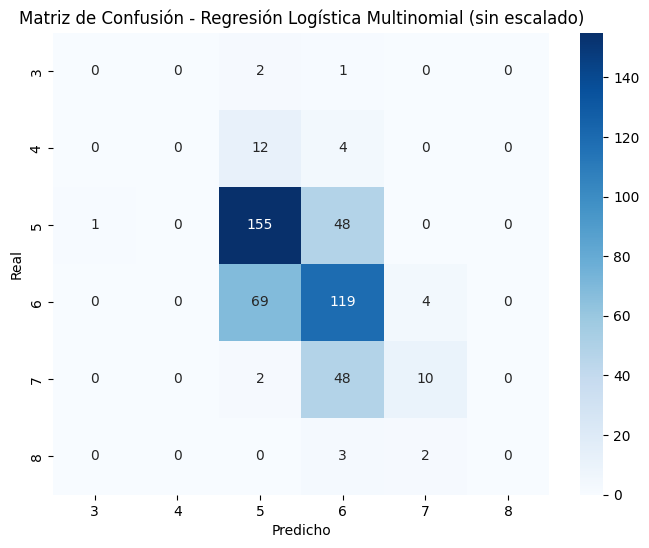

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\

Accuracy medio CV (5 folds): 0.5878781347962383


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Cargar el dataset
df = pd.read_csv("winequality-red.csv", sep=";")

# --- 2) Variables predictoras (X) y respuesta (y)
X = df.drop("quality", axis=1)
y = df["quality"]

# --- 3) Train-test split (70-30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 4) Modelo de regresión logística multinomial
log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

# --- 5) Entrenamiento
log_reg.fit(X_train, y_train)

# --- 6) Predicciones
y_pred = log_reg.predict(X_test)

# --- 7) Evaluación
print("Exactitud en test:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# --- 8) Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística Multinomial (sin escalado)")
plt.show()

# --- 9) Validación cruzada (accuracy promedio en 5 folds)
scores = cross_val_score(log_reg, X, y, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds):", scores.mean())

## 2. Versión robusta (con escalado de variables)

En esta versión se estandarizan las variables predictoras antes de ajustar el modelo. Esto suele mejorar el desempeño y la estabilidad de la regresión logística multinomial.

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

Exactitud en test: 0.6041666666666666

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.66      0.75      0.70       204
           6       0.55      0.64      0.59       192
           7       0.67      0.23      0.35        60
           8       0.00      0.00      0.00         5

    accuracy                           0.60       480
   macro avg       0.31      0.27      0.27       480
weighted avg       0.58      0.60      0.58       480

Accuracy medio CV (5 folds): 0.5810188087774295


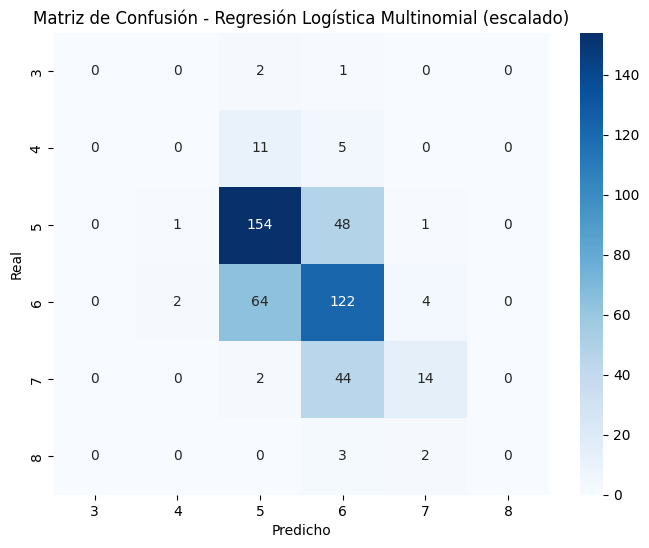

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Cargar el dataset
df = pd.read_csv("winequality-red.csv", sep=";")

# --- 2) Variables predictoras (X) y respuesta (y)
X = df.drop("quality", axis=1)
y = df["quality"]

# --- 3) Train-test split (70-30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 4) Escalado (importante para regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 5) Modelo de regresión logística multinomial
log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

# --- 6) Entrenamiento
log_reg.fit(X_train_scaled, y_train)

# --- 7) Predicciones
y_pred = log_reg.predict(X_test_scaled)

# --- 8) Evaluación
print("Exactitud en test:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# --- 10) Validación cruzada (accuracy promedio en 5 folds)
scores = cross_val_score(log_reg, scaler.fit_transform(X), y, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds):", scores.mean())

# --- 9) Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.sort(y.unique()), 
            yticklabels=np.sort(y.unique()))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística Multinomial (escalado)")
plt.show()



## 3. Versión alternativa: ejemplo compacto para informe

Esta versión resume el flujo en menos pasos, útil para anexos o presentaciones rápidas.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

import os

# Descargar el dataset si no existe
if not os.path.exists('winequality-red.csv'):
	import urllib.request
	url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
	urllib.request.urlretrieve(url, "winequality-red.csv")

# Cargar y preparar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo y evaluación
modelo = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.66      0.75      0.70       204
           6       0.55      0.64      0.59       192
           7       0.67      0.23      0.35        60
           8       0.00      0.00      0.00         5

    accuracy                           0.60       480
   macro avg       0.31      0.27      0.27       480
weighted avg       0.58      0.60      0.58       480



c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


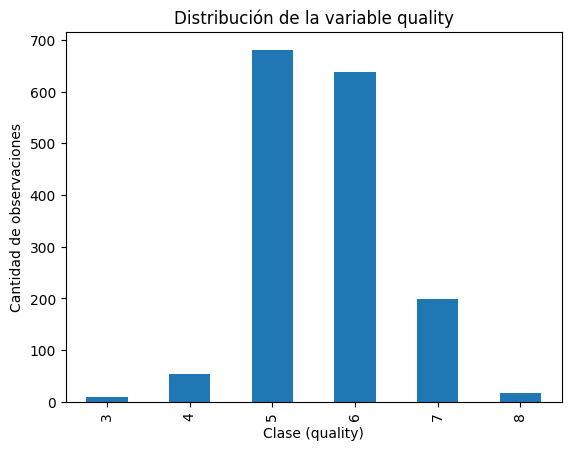

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos (si no está cargado)
df = pd.read_csv('winequality-red.csv', sep=';')

# Conteo de clases
print(df['quality'].value_counts().sort_index())

# Gráfico de barras
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Clase (quality)')
plt.ylabel('Cantidad de observaciones')
plt.title('Distribución de la variable quality')
plt.show()

Accuracy en test (balanced): 0.4479166666666667

Reporte de clasificación (balanced):
               precision    recall  f1-score   support

           3       0.04      0.33      0.08         3
           4       0.07      0.31      0.11        16
           5       0.70      0.57      0.63       204
           6       0.57      0.31      0.40       192
           7       0.39      0.53      0.45        60
           8       0.03      0.20      0.06         5

    accuracy                           0.45       480
   macro avg       0.30      0.38      0.29       480
weighted avg       0.58      0.45      0.49       480



c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


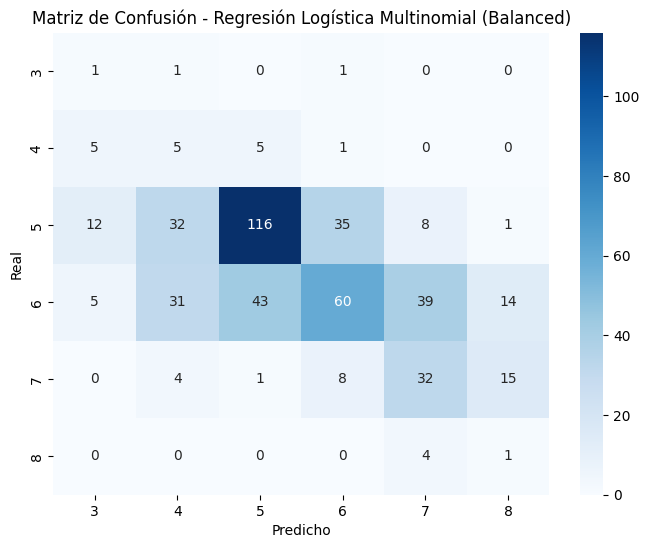

In [5]:
from sklearn.linear_model import LogisticRegression

# Modelo con balanceo de clases
log_reg_bal = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    random_state=42,
    class_weight="balanced"  # <-- aquí está la clave
)

# Entrenamiento
log_reg_bal.fit(X_train_scaled, y_train)

# Predicciones
y_pred_bal = log_reg_bal.predict(X_test_scaled)

# Evaluación
print("Accuracy en test (balanced):", accuracy_score(y_test, y_pred_bal))
print("\nReporte de clasificación (balanced):\n", classification_report(y_test, y_pred_bal))

# Matriz de confusión
cm_bal = confusion_matrix(y_test, y_pred_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.sort(y.unique()), 
            yticklabels=np.sort(y.unique()))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística Multinomial (Balanced)")
plt.show()


## 4. Regresión logística multinomial con datos balanceados (versión estandarizada)

A continuación se muestra cómo balancear las clases usando sobremuestreo (RandomOverSampler) y comparar el desempeño con la versión estandarizada original.

Exactitud en test (balanceado): 0.45208333333333334

Reporte de clasificación (balanceado):
               precision    recall  f1-score   support

           3       0.04      0.33      0.07         3
           4       0.07      0.31      0.12        16
           5       0.71      0.58      0.64       204
           6       0.57      0.31      0.40       192
           7       0.38      0.52      0.44        60
           8       0.03      0.20      0.05         5

    accuracy                           0.45       480
   macro avg       0.30      0.38      0.29       480
weighted avg       0.58      0.45      0.49       480



c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


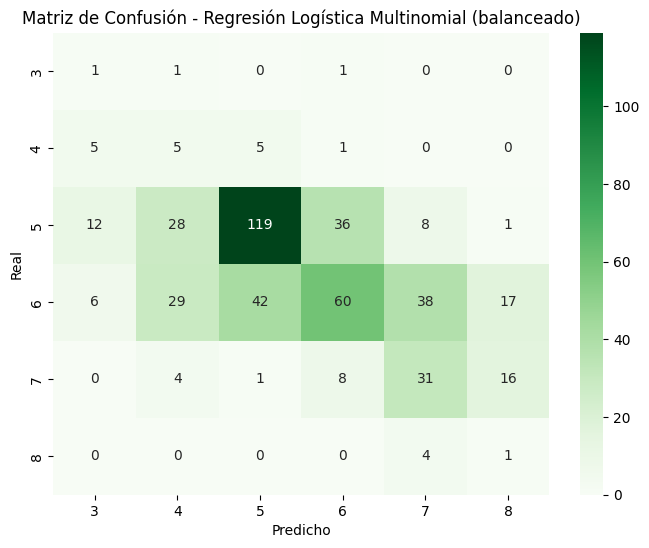

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy medio CV (5 folds, balanceado): 0.6076038272373351


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Pyth

In [7]:
# Balanceo con RandomOverSampler (sobremuestreo)

from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Cargar y preparar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear solo el set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

# Modelo
log_reg_bal = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42)
log_reg_bal.fit(X_train_bal, y_train_bal)

y_pred_bal = log_reg_bal.predict(X_test_scaled)

# Evaluación
print("Exactitud en test (balanceado):", accuracy_score(y_test, y_pred_bal))
print("\nReporte de clasificación (balanceado):\n", classification_report(y_test, y_pred_bal))

# Matriz de confusión
cm_bal = confusion_matrix(y_test, y_pred_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens", xticklabels=np.sort(np.unique(y)), yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística Multinomial (balanceado)")
plt.show()

# Validación cruzada (en todo X balanceado)
scores_bal = cross_val_score(log_reg_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, balanceado):", scores_bal.mean())